# *Лабораторна робота №5.*
# *По темі : Пакет Tensorflow*
***


## **Виконав:** 
* ## Студент 4 курсу
* ## Группи АнД-41
* ## Сірий Артем Олександрович
* ## Варінат №11

***

## *Завдання :*
## 1. Виконати вирішення задачs класифікації для 3 класів з набору даних food101 з використанням різних моделей нейронних мереж:
* ## CNN модель з лабораторної роботи 4
* ## Resnet модель
* ## Efficientnet модель (моделі 1.1-1.3 з використанням оптимізатора Adam)
* ## Моделі 1.2,1.3 з використанням оптимізатора SGD.
* ## Моделі 1.2,1.3 отримані за допомогою tf.keras.applications та треновані з використанням fine-tuning (останні 10 шарів)
## 2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи. 
## Класи : i1=11-1=10 , i2=11+29=40 , i3=11+59=70
## 3. Порівняти результати моделювання із використанням TensorBoard
## 4. Графік(и) порівняння результатів завантажити у форматі .svg та вставити у підсумковий файл поряд із та відповідними висновками
## 5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
## 6. Результати викласти у репозиторії GitHub (папка Lab5).
## 7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

***

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os
import pathlib
import random
import matplotlib.cbook as cbook
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.losses import mae, mse
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
from sklearn.pipeline import Pipeline

## Імпортуємо класи

In [2]:
data_folder_bruschetta = pathlib.Path("../Lab4/train/")
class_names = np.array(sorted([item.name for item in data_folder_bruschetta.glob('*')]))
print(class_names)

['bruschetta' 'grilled_salmon' 'pad_thai']


In [3]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class,color='white')
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

## Виведемо 10 рандомних фото

Image shape: (512, 512, 3)
Image shape: (512, 382, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (306, 512, 3)
Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


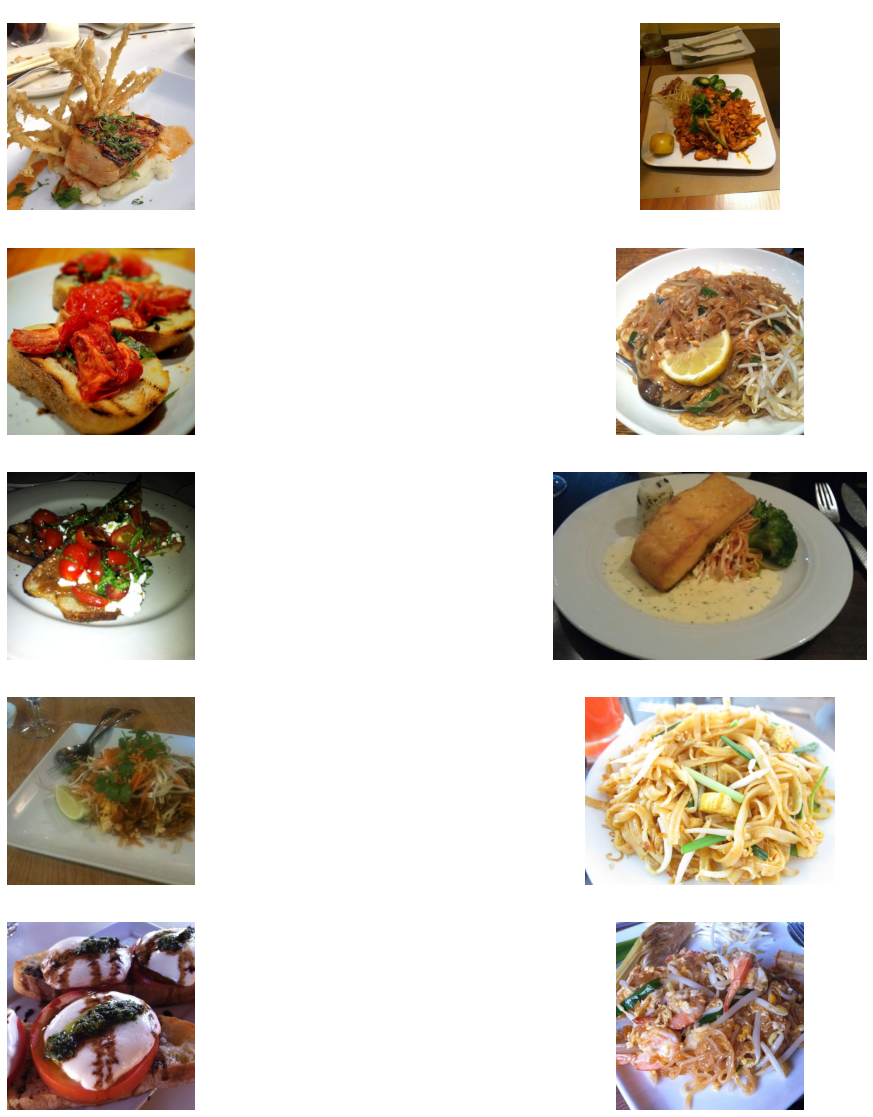

In [4]:
foo = ["bruschetta", "grilled_salmon", "pad_thai"] 
secure_random = random.SystemRandom()
plt.figure(figsize=(20,20))
for p in range(10):
    foo_choice = secure_random.choice(foo)
    plt.subplot(5,2,p+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(view_random_image(target_dir="../Lab4/train/", target_class=foo_choice))
    

In [5]:
tf.random.set_seed(11)

# Зведення до бінарного виду (чорно-білого)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "../Lab4/train/"
test_dir = "../Lab4/test/"

train_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode='categorical',
                                               seed=11)

valid_data = valid_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=11)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
IMAGE_SHAPE=(224,224)

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## CNN model

In [7]:
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax') 
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history_1 = model_1.fit(train_data,
                        epochs=7,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[create_tensorboard_callback(dir_name="Lab5", experiment_name="CNN")])

Saving TensorBoard log files to: Lab5/CNN/20211125-101141
Epoch 1/7
24/24 [==============================] - 17s 689ms/step - loss: 1.1338 - accuracy: 0.3400 - val_loss: 1.0926 - val_accuracy: 0.3333
Epoch 2/7
24/24 [==============================] - 15s 605ms/step - loss: 1.0765 - accuracy: 0.3880 - val_loss: 1.0714 - val_accuracy: 0.3689
Epoch 3/7
24/24 [==============================] - 15s 612ms/step - loss: 0.9955 - accuracy: 0.4893 - val_loss: 1.0018 - val_accuracy: 0.5156
Epoch 4/7
24/24 [==============================] - 15s 624ms/step - loss: 0.9215 - accuracy: 0.5827 - val_loss: 0.9397 - val_accuracy: 0.5244
Epoch 5/7
24/24 [==============================] - 15s 620ms/step - loss: 0.8110 - accuracy: 0.6640 - val_loss: 0.9552 - val_accuracy: 0.5200
Epoch 6/7
24/24 [==============================] - 15s 610ms/step - loss: 0.7484 - accuracy: 0.6893 - val_loss: 1.1786 - val_accuracy: 0.4489
Epoch 7/7
24/24 [==============================] - 15s 620ms/step - loss: 0.6083 - accurac

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

<AxesSubplot:>

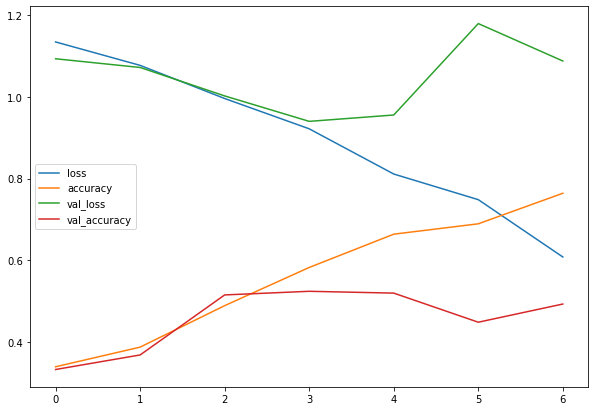

In [9]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7))

In [10]:
%reload_ext tensorboard
%tensorboard --logdir='./Lab5/CNN/'

Reusing TensorBoard on port 6006 (pid 15064), started 7 days, 11:23:31 ago. (Use '!kill 15064' to kill it.)

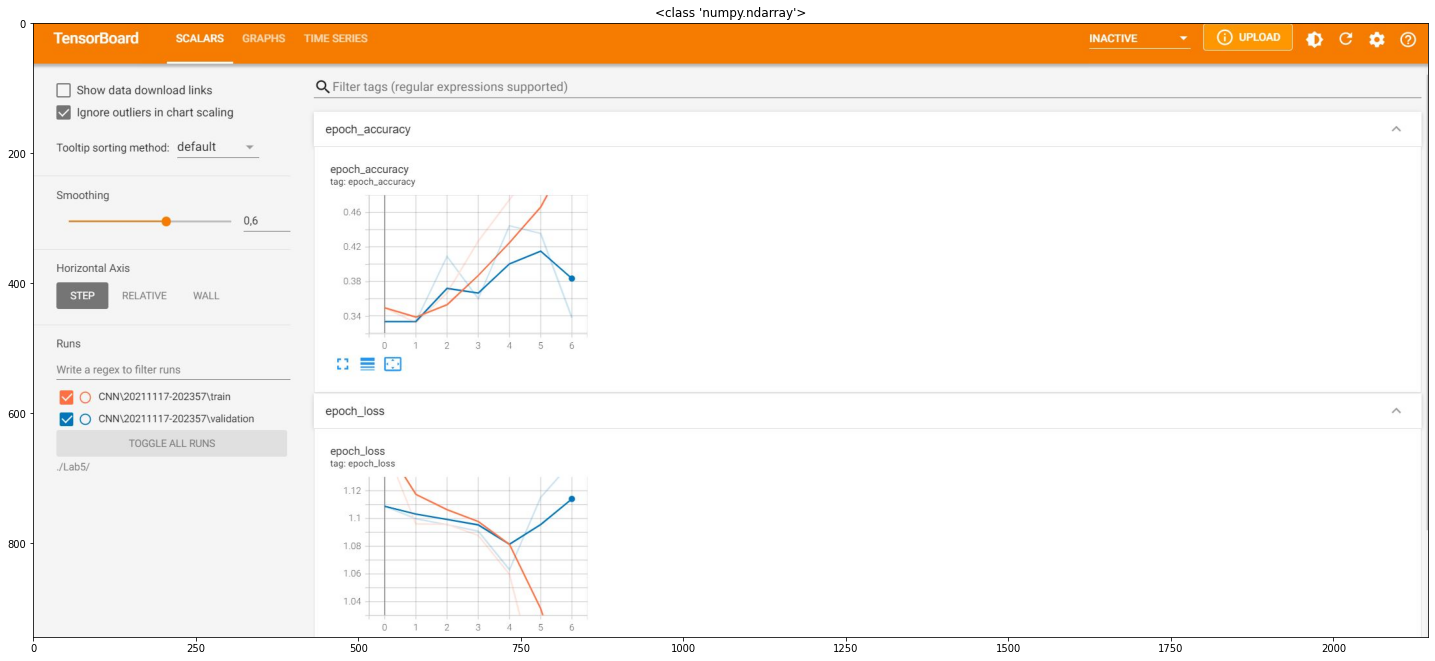

In [11]:
with cbook.get_sample_data(r'D:\Program\Microsoft VS Code Prog\Neural Networks\Lab5\TfBoard\CNN.jpg') as image_file:
    image = plt.imread(image_file)
fig, ax = plt.subplots()

ax.imshow(image)
ax.set_title(type(image))

fig.set_figwidth(25)
fig.set_figheight(25)  

plt.show()

In [12]:
model_1_results = pd.DataFrame(history_1.history)

In [13]:
resnet_url="https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/5"
efficientnet_url="https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

def create_BC_model(model_url):
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    Dense(3, activation='sigmoid', name='output_layer') # create our own output layer      
  ])

  return model

## Resnet model

In [14]:
resnet_model= create_BC_model(resnet_url)
resnet_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
history_2 = resnet_model.fit(train_data, 
                epochs=7, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="Lab5", experiment_name="resnet")]
)

Saving TensorBoard log files to: Lab5/resnet/20211125-101332
Epoch 1/7
24/24 [==============================] - 50s 2s/step - loss: 0.8067 - accuracy: 0.6240 - val_loss: 0.4775 - val_accuracy: 0.8133
Epoch 2/7
24/24 [==============================] - 42s 2s/step - loss: 0.3260 - accuracy: 0.8720 - val_loss: 0.4033 - val_accuracy: 0.8400
Epoch 3/7
24/24 [==============================] - 43s 2s/step - loss: 0.2555 - accuracy: 0.9000 - val_loss: 0.3773 - val_accuracy: 0.8489
Epoch 4/7
24/24 [==============================] - 43s 2s/step - loss: 0.2115 - accuracy: 0.9320 - val_loss: 0.3818 - val_accuracy: 0.8489
Epoch 5/7
24/24 [==============================] - 44s 2s/step - loss: 0.1856 - accuracy: 0.9387 - val_loss: 0.3778 - val_accuracy: 0.8533
Epoch 6/7
24/24 [==============================] - 43s 2s/step - loss: 0.1682 - accuracy: 0.9400 - val_loss: 0.3732 - val_accuracy: 0.8711
Epoch 7/7
24/24 [==============================] - 44s 2s/step - loss: 0.1399 - accuracy: 0.9573 - val_lo

In [15]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              42605504  
_________________________________________________________________
output_layer (Dense)         (None, 3)                 6147      
Total params: 42,611,651
Trainable params: 6,147
Non-trainable params: 42,605,504
_________________________________________________________________


<AxesSubplot:>

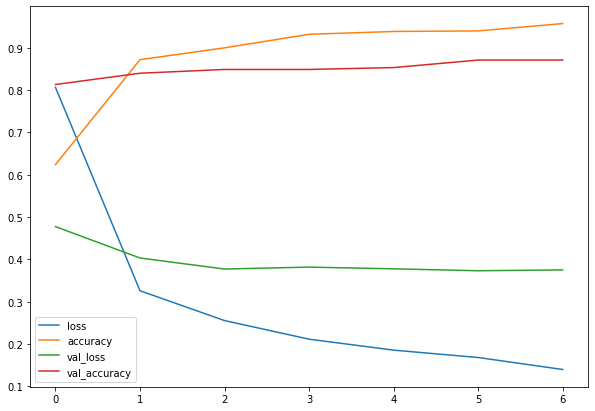

In [16]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7))

In [17]:
%reload_ext tensorboard
%tensorboard --logdir='./Lab5/resnet/'

Reusing TensorBoard on port 6006 (pid 18100), started 7 days, 11:19:22 ago. (Use '!kill 18100' to kill it.)

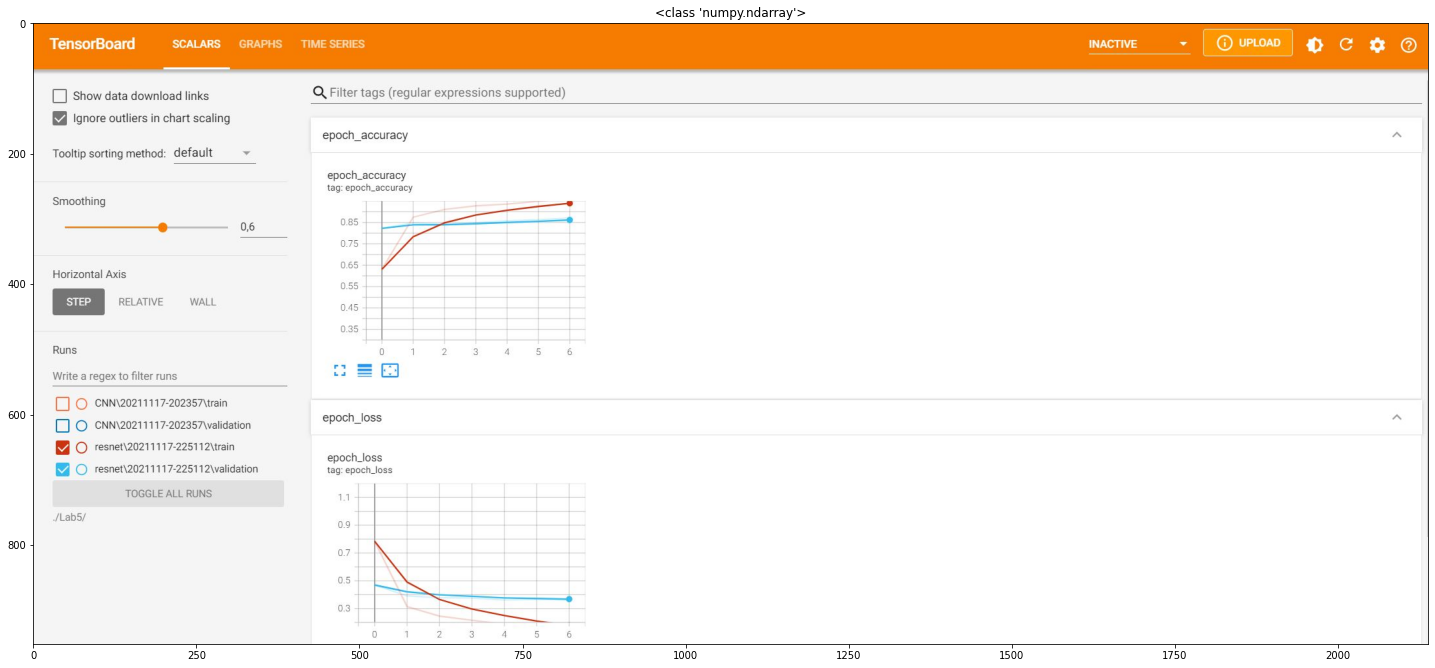

In [18]:
with cbook.get_sample_data(r'D:\Program\Microsoft VS Code Prog\Neural Networks\Lab5\TfBoard\Resnet.jpg') as image_file:
    image = plt.imread(image_file)
fig, ax = plt.subplots()

ax.imshow(image)
ax.set_title(type(image))

fig.set_figwidth(25)
fig.set_figheight(25)  

plt.show()

In [19]:
resnet_results = pd.DataFrame(history_2.history)

## Efficientnet model

In [20]:
efficientnet_model= create_BC_model(efficientnet_url)
efficientnet_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
history_3 = efficientnet_model.fit(train_data, 
                epochs=7, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="Lab5", experiment_name="efficientnet")]
)

Saving TensorBoard log files to: Lab5/efficientnet/20211125-101849
Epoch 1/7
24/24 [==============================] - 28s 954ms/step - loss: 0.7092 - accuracy: 0.7560 - val_loss: 0.4908 - val_accuracy: 0.8667
Epoch 2/7
24/24 [==============================] - 20s 853ms/step - loss: 0.3537 - accuracy: 0.9133 - val_loss: 0.3502 - val_accuracy: 0.8978
Epoch 3/7
24/24 [==============================] - 20s 843ms/step - loss: 0.2626 - accuracy: 0.9360 - val_loss: 0.2960 - val_accuracy: 0.9067
Epoch 4/7
24/24 [==============================] - 20s 845ms/step - loss: 0.2199 - accuracy: 0.9440 - val_loss: 0.2682 - val_accuracy: 0.9111
Epoch 5/7
24/24 [==============================] - 21s 861ms/step - loss: 0.1955 - accuracy: 0.9467 - val_loss: 0.2526 - val_accuracy: 0.9156
Epoch 6/7
24/24 [==============================] - 21s 874ms/step - loss: 0.1750 - accuracy: 0.9480 - val_loss: 0.2364 - val_accuracy: 0.9156
Epoch 7/7
24/24 [==============================] - 21s 865ms/step - loss: 0.1589 

In [21]:
efficientnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 3)                 3843      
Total params: 4,053,407
Trainable params: 3,843
Non-trainable params: 4,049,564
_________________________________________________________________


<AxesSubplot:>

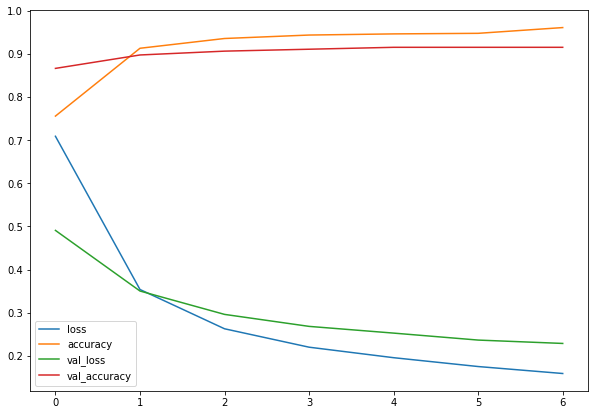

In [22]:
pd.DataFrame(history_3.history).plot(figsize=(10, 7))

In [23]:
%reload_ext tensorboard
%tensorboard --logdir='./Lab5/efficientnet/'

Reusing TensorBoard on port 6006 (pid 18028), started 7 days, 11:19:04 ago. (Use '!kill 18028' to kill it.)

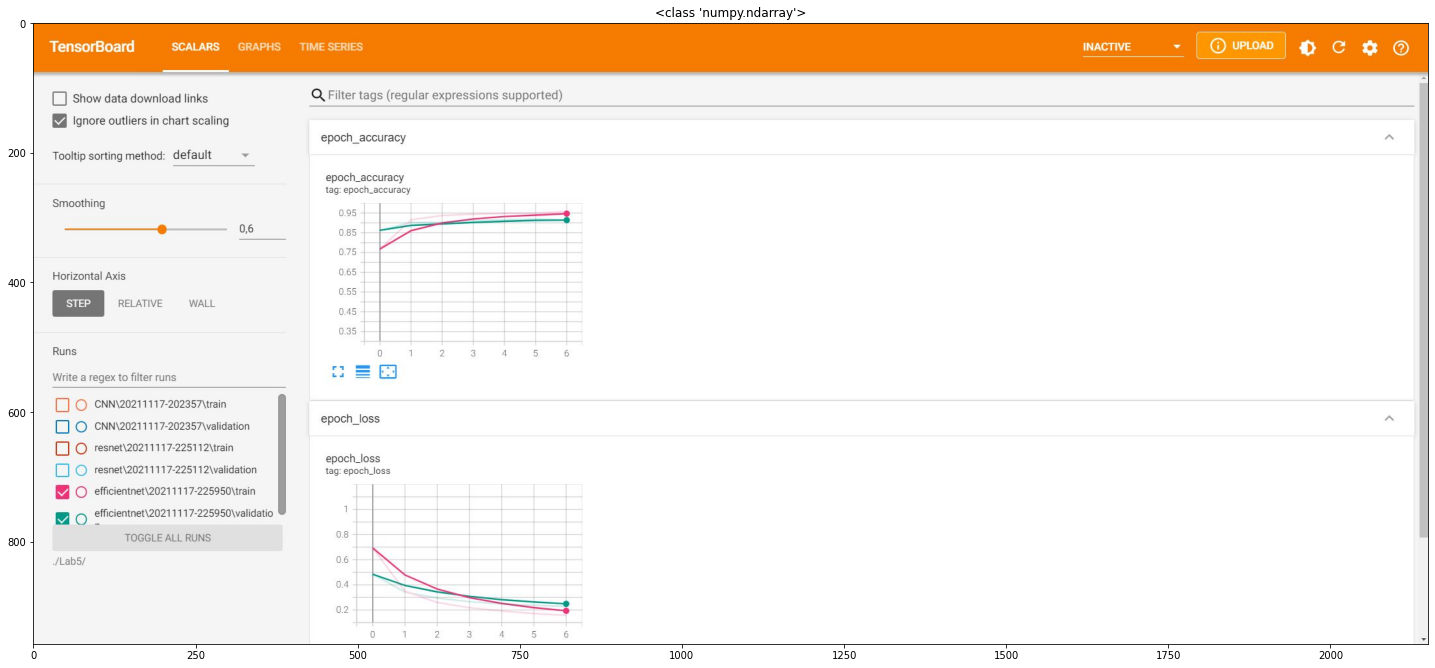

In [24]:
with cbook.get_sample_data(r'D:\Program\Microsoft VS Code Prog\Neural Networks\Lab5\TfBoard\Efficientnet.jpg') as image_file:
    image = plt.imread(image_file)
fig, ax = plt.subplots()

ax.imshow(image)
ax.set_title(type(image))

fig.set_figwidth(25)
fig.set_figheight(25)  

plt.show()

In [25]:
efficientnet_results = pd.DataFrame(history_3.history)

## Resnet + sgd

In [27]:
resnet_model2= create_BC_model(resnet_url)
resnet_model2.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    metrics=['accuracy']
)
history_4 = resnet_model2.fit(train_data, 
                epochs=7, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="Lab5", experiment_name="resnet_sgd")]
)

Saving TensorBoard log files to: Lab5/resnet_sgd/20211125-102633
Epoch 1/7
24/24 [==============================] - 56s 2s/step - loss: 0.7627 - accuracy: 0.6787 - val_loss: 0.4910 - val_accuracy: 0.7867
Epoch 2/7
24/24 [==============================] - 51s 2s/step - loss: 0.3398 - accuracy: 0.8507 - val_loss: 0.5443 - val_accuracy: 0.7956
Epoch 3/7
24/24 [==============================] - 51s 2s/step - loss: 0.3311 - accuracy: 0.8560 - val_loss: 0.3781 - val_accuracy: 0.8444
Epoch 4/7
24/24 [==============================] - 51s 2s/step - loss: 0.2714 - accuracy: 0.8947 - val_loss: 0.3950 - val_accuracy: 0.8311
Epoch 5/7
24/24 [==============================] - 51s 2s/step - loss: 0.2788 - accuracy: 0.8693 - val_loss: 0.3605 - val_accuracy: 0.8444
Epoch 6/7
24/24 [==============================] - 51s 2s/step - loss: 0.2116 - accuracy: 0.9280 - val_loss: 0.3814 - val_accuracy: 0.8444
Epoch 7/7
24/24 [==============================] - 50s 2s/step - loss: 0.2103 - accuracy: 0.9293 - va

In [28]:
%reload_ext tensorboard
%tensorboard --logdir='./Lab5/resnet_sgd/'

Reusing TensorBoard on port 6006 (pid 15752), started 7 days, 11:24:11 ago. (Use '!kill 15752' to kill it.)

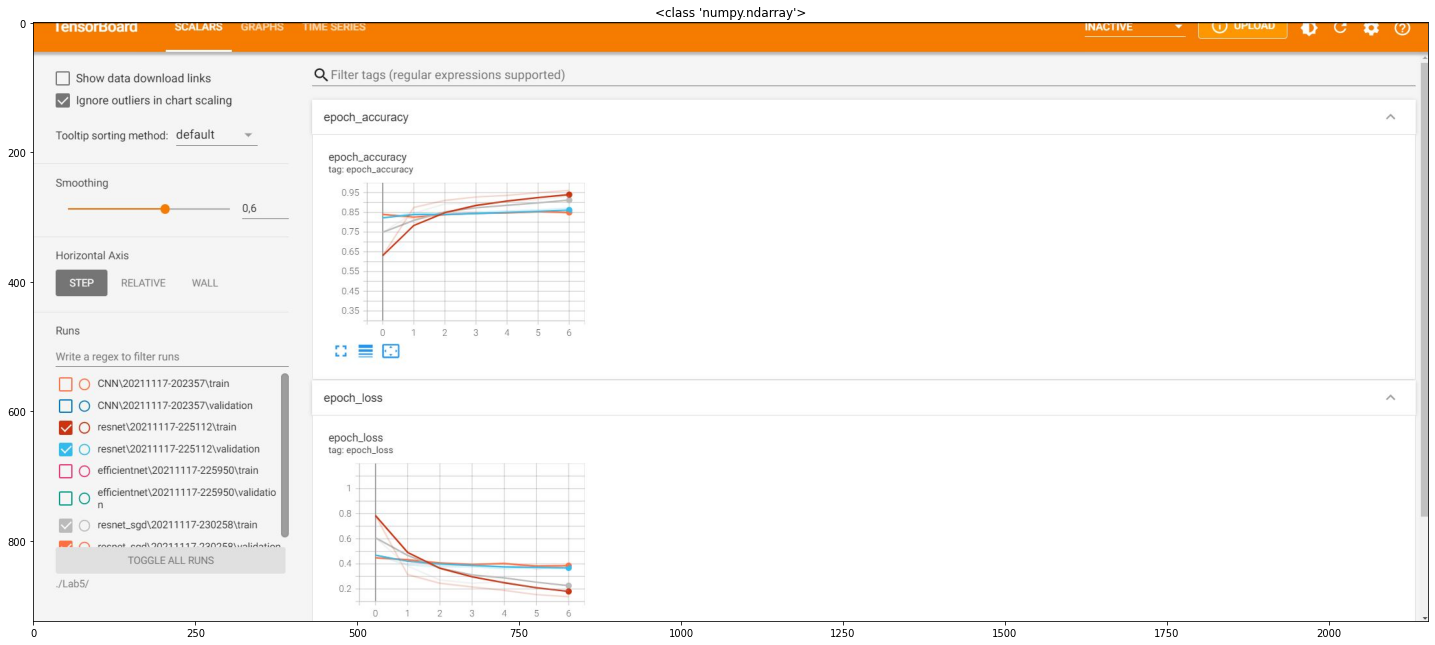

In [29]:
with cbook.get_sample_data(r'D:\Program\Microsoft VS Code Prog\Neural Networks\Lab5\TfBoard\Resnet_SGD.jpg') as image_file:
    image = plt.imread(image_file)
fig, ax = plt.subplots()

ax.imshow(image)
ax.set_title(type(image))

fig.set_figwidth(25)
fig.set_figheight(25)  

plt.show()

In [30]:
resnet_sgd_results = pd.DataFrame(history_4.history)

## Efficientnet + sgd

In [31]:
efficientnet_model2= create_BC_model(efficientnet_url)
efficientnet_model2.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    metrics=['accuracy']
)
history_5 = efficientnet_model2.fit(train_data, 
                epochs=7, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="Lab5", experiment_name="efficientnet_sgd")]
)

Saving TensorBoard log files to: Lab5/efficientnet_sgd/20211125-103241
Epoch 1/7
24/24 [==============================] - 28s 970ms/step - loss: 0.8937 - accuracy: 0.6040 - val_loss: 0.6891 - val_accuracy: 0.7867
Epoch 2/7
24/24 [==============================] - 20s 839ms/step - loss: 0.5880 - accuracy: 0.8400 - val_loss: 0.5250 - val_accuracy: 0.8978
Epoch 3/7
24/24 [==============================] - 20s 850ms/step - loss: 0.4603 - accuracy: 0.8867 - val_loss: 0.4453 - val_accuracy: 0.9156
Epoch 4/7
24/24 [==============================] - 20s 865ms/step - loss: 0.3924 - accuracy: 0.9067 - val_loss: 0.3955 - val_accuracy: 0.9111
Epoch 5/7
24/24 [==============================] - 21s 885ms/step - loss: 0.3495 - accuracy: 0.9147 - val_loss: 0.3640 - val_accuracy: 0.9067
Epoch 6/7
24/24 [==============================] - 21s 901ms/step - loss: 0.3194 - accuracy: 0.9253 - val_loss: 0.3416 - val_accuracy: 0.8978
Epoch 7/7
24/24 [==============================] - 20s 856ms/step - loss: 0.2

In [32]:
%reload_ext tensorboard
%tensorboard --logdir='./Lab5/efficientnet_sgd/'

Reusing TensorBoard on port 6006 (pid 14620), started 7 days, 11:23:43 ago. (Use '!kill 14620' to kill it.)

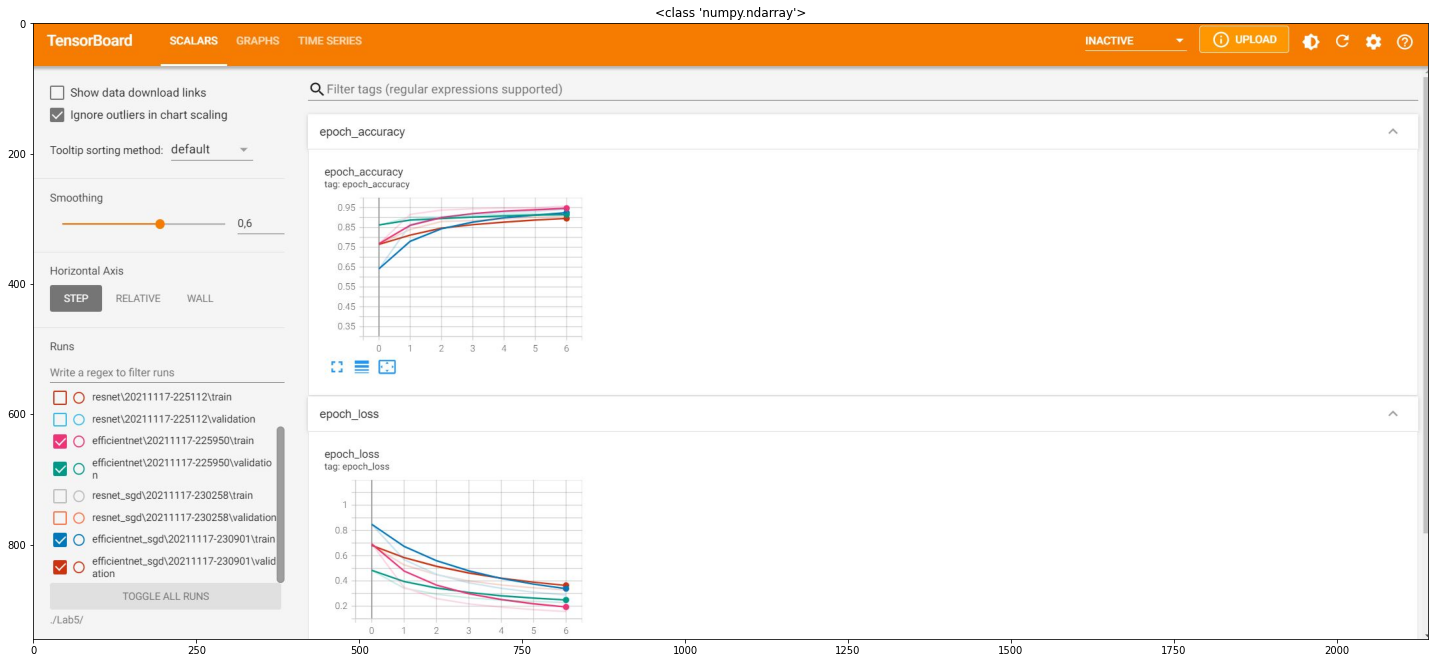

In [33]:
with cbook.get_sample_data(r'D:\Program\Microsoft VS Code Prog\Neural Networks\Lab5\TfBoard\Efficientnet_SGD.jpg') as image_file:
    image = plt.imread(image_file)
fig, ax = plt.subplots()

ax.imshow(image)
ax.set_title(type(image))

fig.set_figwidth(25)
fig.set_figheight(25)  

plt.show()

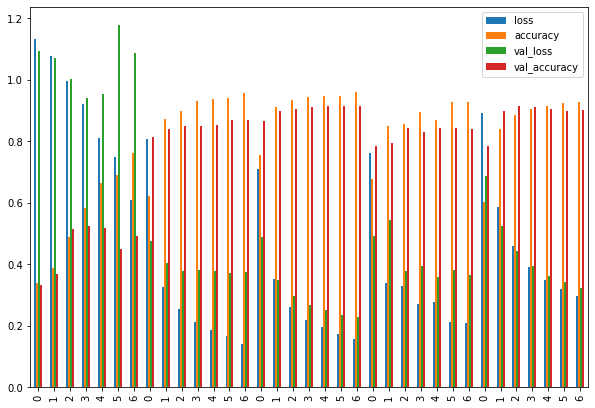

In [34]:
efficientnet_sgd_results = pd.DataFrame(history_5.history)
all_models_results = pd.concat([model_1_results, resnet_results,efficientnet_results,resnet_sgd_results,efficientnet_sgd_results])
all_models_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

## Resnet 10 layers 

In [37]:
for layer in resnet_model.layers[-10:]:
    layer.trainable=True

resnet_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

history_2_UPD = resnet_model.fit(train_data, 
                epochs=2, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="Lab5", experiment_name="resnet_2")]
)

Saving TensorBoard log files to: Lab5/resnet_2/20211125-105858
Epoch 1/2
24/24 [==============================] - 237s 10s/step - loss: 0.9557 - accuracy: 0.7773 - val_loss: 8193709.5000 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 223s 9s/step - loss: 0.7329 - accuracy: 0.8493 - val_loss: 776319.4375 - val_accuracy: 0.3333


In [38]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              42605504  
_________________________________________________________________
output_layer (Dense)         (None, 3)                 6147      
Total params: 42,611,651
Trainable params: 42,506,307
Non-trainable params: 105,344
_________________________________________________________________


<AxesSubplot:>

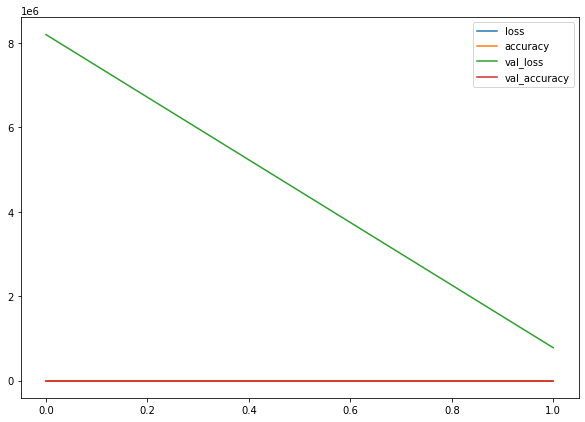

In [39]:
pd.DataFrame(history_2_UPD.history).plot(figsize=(10, 7))

## Результат досить поганий. Дуже великі втрати, мала точність, погана ефективність. 
## Розробимо для Efficient 10 layers

In [42]:
for layer in efficientnet_model.layers[-10:]:
    layer.trainable=True

efficientnet_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

history_3_UPD = efficientnet_model.fit(train_data, 
                epochs=2, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="Lab5", experiment_name="efficientnet_2")]
)

Saving TensorBoard log files to: Lab5/efficientnet_2/20211125-110749
Epoch 1/2
24/24 [==============================] - 89s 3s/step - loss: 0.5406 - accuracy: 0.8507 - val_loss: 0.6606 - val_accuracy: 0.8800
Epoch 2/2
24/24 [==============================] - 75s 3s/step - loss: 0.2637 - accuracy: 0.9573 - val_loss: 1.1357 - val_accuracy: 0.8044


In [44]:
efficientnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 3)                 3843      
Total params: 4,053,407
Trainable params: 4,011,391
Non-trainable params: 42,016
_________________________________________________________________


<AxesSubplot:>

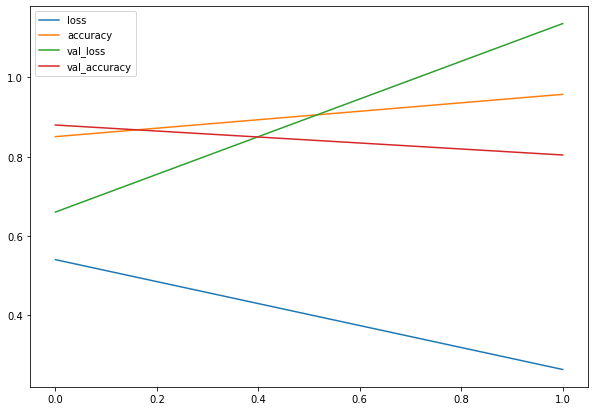

In [45]:
pd.DataFrame(history_3_UPD.history).plot(figsize=(10, 7))

## Як видно , модель показала гірші результати, а ніж Efficientnet + sgd , що не кажучи про Efficientnet на Adam. Проте значно кращі аніж Resnet для 10-ти шарів

***
# *Висновок*
***
## *В ході виконання лаборатоної роботи було використано бібліотеку з набором фотографій їжі. До варіанту відносились брускети, риба та паста.*
## *Загальна кількість вибірки 975 екземплярів. З них 750 на тестову вибірку та 225 на валідаційну. Класи розподілені рівномірно за кількістю.*
## *Провевши моделювання 5-ти моделей, було виявлено, що efficientnet з оптимайзером Adam відпрацювала найбільш успішно з поміж усіх. У порівнянні з оптимайзером SGD має кращі значення.*
## *Модель resnet показала також високу точність, проте різниця оптимізаційних функцій є досить малою.*
## *Щож до моделі CNN, вона є досить поганою у порівнянні з конкурентами.*